In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

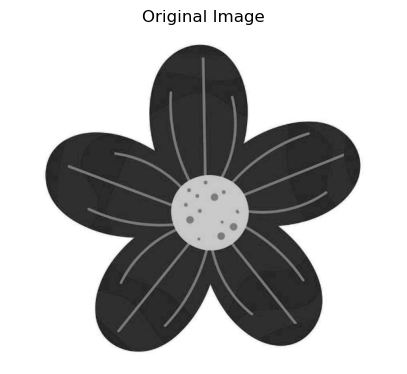

In [2]:
# Read image in grayscale
img = cv2.imread(r'C:\Users\LENOVO\OneDrive\Desktop\miranda\b.png', 0)  # 0 -> grayscale

if img is None:
    print("Error: image not found. Check file name/path.")
else:
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')


a) Apply FFT on given image

(-0.5, 590.5, 508.5, -0.5)

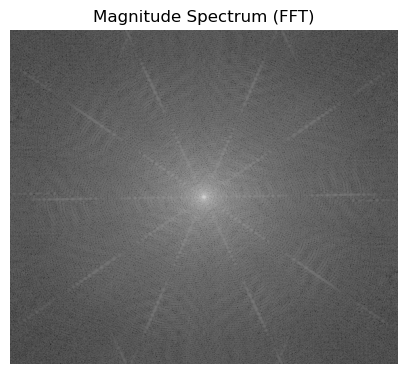

In [3]:
# Convert to float for processing
img_float = np.float32(img)

# 2D FFT
f = np.fft.fft2(img_float)

# Shift zero frequency to the center
fshift = np.fft.fftshift(f)

# Magnitude spectrum (log scale for visibility)
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

plt.figure(figsize=(5,5))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum (FFT)")
plt.axis('off')


b) Perform low-pass and high-pass filtering in frequency domain

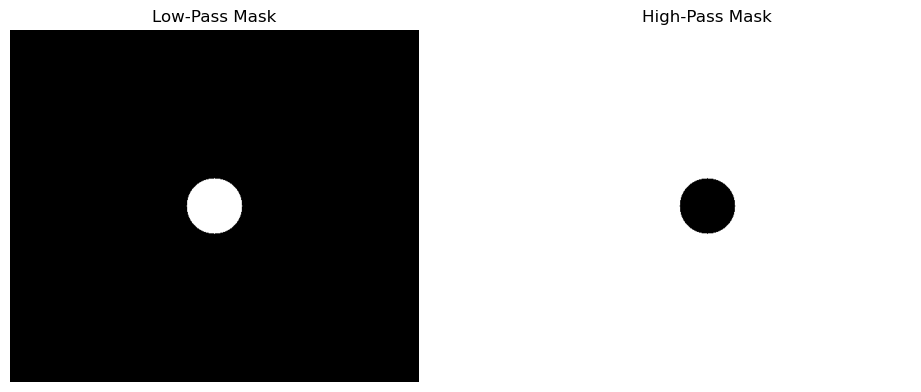

In [4]:
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2   # center

# Cutoff radius (you can change this)
D0 = 40  

# Create a circular low-pass mask
low_pass_mask = np.zeros((rows, cols), np.uint8)
for u in range(rows):
    for v in range(cols):
        D = np.sqrt((u - crow)**2 + (v - ccol)**2)
        if D <= D0:
            low_pass_mask[u, v] = 1

# High-pass mask is just the inverse
high_pass_mask = 1 - low_pass_mask

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(low_pass_mask, cmap='gray')
plt.title("Low-Pass Mask")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(high_pass_mask, cmap='gray')
plt.title("High-Pass Mask")
plt.axis('off')

plt.tight_layout()
plt.show()


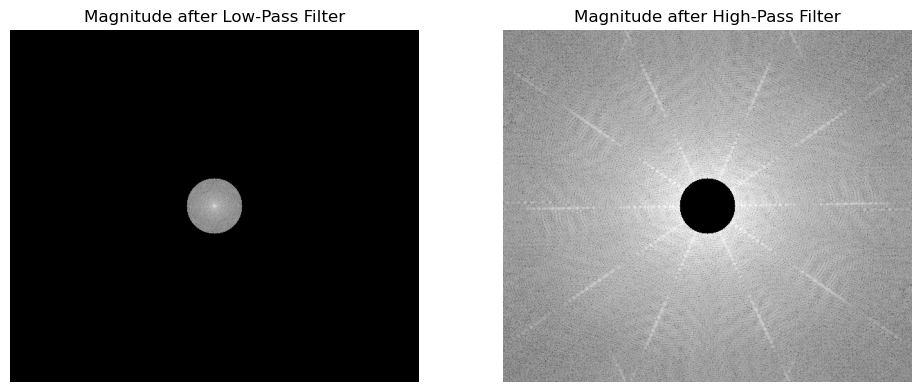

In [5]:
# Apply low-pass filter
fshift_low = fshift * low_pass_mask
magnitude_lp = 20 * np.log(np.abs(fshift_low) + 1)

# Apply high-pass filter
fshift_high = fshift * high_pass_mask
magnitude_hp = 20 * np.log(np.abs(fshift_high) + 1)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(magnitude_lp, cmap='gray')
plt.title("Magnitude after Low-Pass Filter")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(magnitude_hp, cmap='gray')
plt.title("Magnitude after High-Pass Filter")
plt.axis('off')

plt.tight_layout()
plt.show()


c) Apply IFFT to reconstruct image

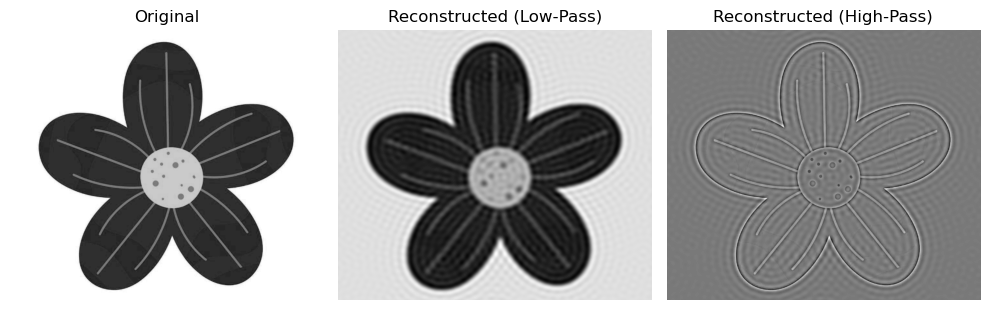

In [7]:
# ----- Low-Pass Reconstruction -----
# Shift back
f_ishift_low = np.fft.ifftshift(fshift_low)

# Inverse FFT
img_back_low = np.fft.ifft2(f_ishift_low)

# Take real part
img_back_low = np.real(img_back_low)

# ----- High-Pass Reconstruction -----
f_ishift_high = np.fft.ifftshift(fshift_high)
img_back_high = np.fft.ifft2(f_ishift_high)
img_back_high = np.real(img_back_high)

# Display results
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(img_back_low, cmap='gray')
plt.title("Reconstructed (Low-Pass)")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(img_back_high, cmap='gray')
plt.title("Reconstructed (High-Pass)")
plt.axis('off')

plt.tight_layout()
plt.show()
